In [1]:
# 기본
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 경고 뜨지 않게 설정
import warnings
warnings.filterwarnings('ignore')

# 그래프 설정
sns.set()

# 그래프 기본 설정
plt.rcParams['font.family'] = 'Malgun Gothic'
# plt.rcParams['font.family'] = 'AppleGothic'
plt.rcParams['figure.figsize'] = 12, 6
plt.rcParams['font.size'] = 14
plt.rcParams['axes.unicode_minus'] = False

# 데이터 전처리 알고리즘
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

# 학습용과 검증용으로 나누는 함수
from sklearn.model_selection import train_test_split

# 교차 검증
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold

# 평가함수
# 분류용
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score

# 회귀용
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

# 모델의 최적의 하이퍼 파라미터를 찾기 위한 도구
from sklearn.model_selection import GridSearchCV

# 머신러닝 알고리즘 - 분류
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import VotingClassifier

# 머신러닝 알고리즘 - 회귀
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor
from sklearn.ensemble import VotingRegressor

# 학습 모델 저장을 위한 라이브러리
import pickle

# 시간 관련
import time

In [2]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# 파일 경로
file_path = 'data/신용정보_with_segment.csv'

# 사용할 컬럼 목록
selected_columns = [
    "Segment",
    "최초한도금액",
    "카드이용한도금액",
    "CA한도금액",
    "일시상환론한도금액",
    "월상환론한도금액",
    "CA이자율_할인전",
    "CL이자율_할인전",
    "RV일시불이자율_할인전",
    "RV현금서비스이자율_할인전",
    "RV약정청구율",
    "RV최소결제비율",
    "한도증액횟수_R12M",
    "한도증액금액_R12M",
    "상향가능CA한도금액",
    "월상환론상향가능한도금액",
    "일시불ONLY전환가능여부",
    "특별한도보유여부_R3M",
    "연체감액여부_R3M",
    "ID",
    "기준년월"
]

In [3]:
# 3. 파일 불러오기
df = pd.read_csv(file_path, usecols=selected_columns)

# 결과 확인
display(df)

,기준년월,ID,최초한도금액,카드이용한도금액,CA한도금액,일시상환론한도금액,월상환론한도금액,CA이자율_할인전,CL이자율_할인전,RV일시불이자율_할인전,...,RV약정청구율,RV최소결제비율,한도증액횟수_R12M,한도증액금액_R12M,상향가능CA한도금액,월상환론상향가능한도금액,일시불ONLY전환가능여부,특별한도보유여부_R3M,연체감액여부_R3M,Segment
0,201807,TRAIN_000000,0,19354,7270,0,0,22.995207,18.254978,17.264967,...,0.0000,19.99996,0회,0,0,0,0,0,0,D
1,201807,TRAIN_000001,0,9996,5718,41996,90611,14.793821,14.834873,10.622446,...,99.9998,9.99998,0회,0,1,0,1,0,0,E
2,201807,TRAIN_000002,0,88193,35207,0,0,22.014276,17.875321,17.155829,...,99.9998,19.99996,0회,0,0,0,0,0,0,C
3,201807,TRAIN_000003,0,19062,6531,0,0,22.998014,22.999453,19.293674,...,0.0000,19.99996,0회,0,0,0,0,0,0,D
4,201807,TRAIN_000004,0,177222,47149,48000,155020,14.661948,10.897410,10.654587,...,0.0000,9.99998,0회,0,0,0,1,0,0,E
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2399995,201812,TRAIN_399995,0,20070,10167,0,54445,15.243670,11.900516,10.545876,...,0.0000,9.99998,0회,0,1,0,1,0,0,E
2399996,201812,TRAIN_399996,0,84217,31159,0,156800,14.843464,15.652063,11.102726,...,0.0000,9.99998,1회이상,1,3,0,1,0,0,D
2399997,201812,TRAIN_399997,0,52612,19429,0,0,17.038599,17.966213,13.278475,...,0.0000,19.99996,0회,0,0,0,0,0,0,C
2399998,201812,TRAIN_399998,0,10002,4228,90004,180906,15.182880,11.901089,10.594124,...,0.0000,9.99998,0회,0,1,0,1,0,0,E


### 한도증액횟수 숫자로 변환

In [5]:
display(df['한도증액횟수_R12M'].value_counts())

# 매핑 딕셔너리 정의
visitday_mapping = {
    "0회": 1,
    "1회이상": 10
}

# 매핑 적용
df["한도증액횟수_R12M"] = df["한도증액횟수_R12M"].map(visitday_mapping)

# 결과 확인
print(df[["한도증액횟수_R12M"]].head())

한도증액횟수_R12M
0회      2116131
1회이상     283869
Name: count, dtype: int64

   한도증액횟수_R12M
0            1
1            1
2            1
3            1
4            1


### 애매한 컬럼들 대상으로 VIF 및 상관 확인

In [7]:
# 분석 대상 애매한 컬럼들
vif_columns = [
    "최초한도금액",
    "CA이자율_할인전",
    "CL이자율_할인전",
    "한도증액횟수_R12M",
    "카드이용한도금액_B1M",
    "카드이용한도금액_B2M",
    "카드이용한도금액"
]


In [8]:
# 원본 df 불러오기
df = pd.read_csv('data/신용정보_with_segment.csv')

# 매핑 먼저 적용
visitday_mapping = {
    "0회": 1,
    "1회이상": 10
}
df["한도증액횟수_R12M"] = df["한도증액횟수_R12M"].map(visitday_mapping)

# 필요한 컬럼만 추출 + 수치형 변환
vif_columns = [
    "최초한도금액",
    "CA이자율_할인전",
    "CL이자율_할인전",
    "한도증액횟수_R12M",
    "카드이용한도금액_B1M",
    "카드이용한도금액_B2M",
    "카드이용한도금액"
]
df_vif = df[vif_columns].apply(pd.to_numeric, errors='coerce').dropna()

# VIF 계산
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif_data = pd.DataFrame()
vif_data["Feature"] = df_vif.columns
vif_data["VIF"] = [variance_inflation_factor(df_vif.values, i) for i in range(df_vif.shape[1])]

# 결과 출력
display(vif_data.sort_values(by="VIF", ascending=False))

,Feature,VIF
4,카드이용한도금액_B1M,109.226809
1,CA이자율_할인전,78.253408
2,CL이자율_할인전,75.994273
5,카드이용한도금액_B2M,75.884371
6,카드이용한도금액,52.127711
3,한도증액횟수_R12M,1.513534
0,최초한도금액,1.145719


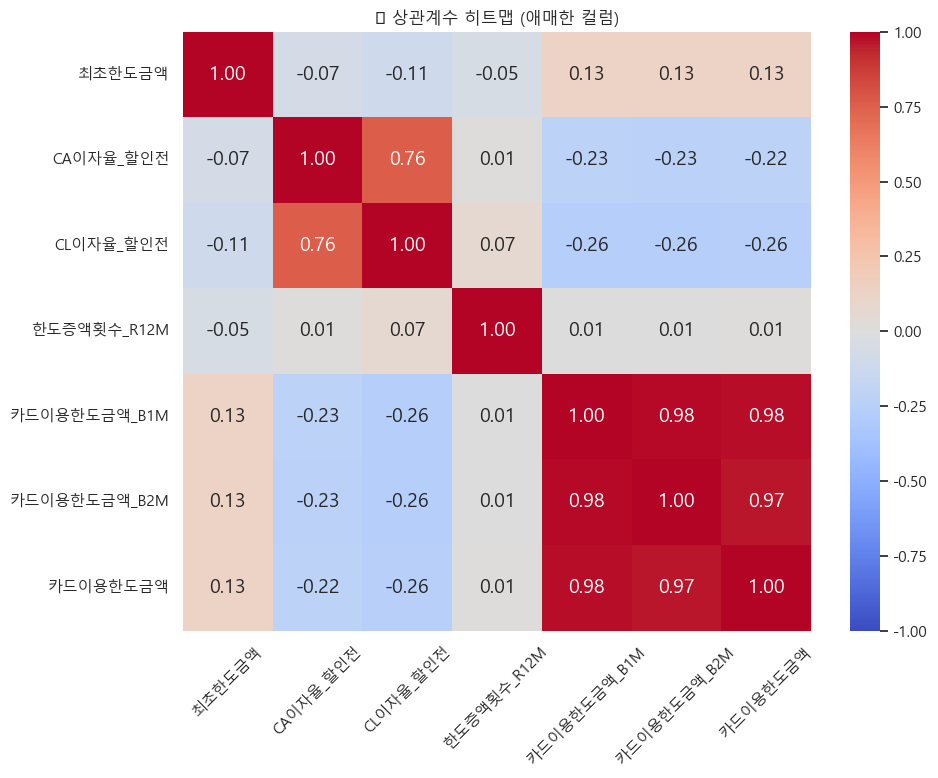

In [9]:
# 상관계수 히트맵
plt.figure(figsize=(10, 8))
sns.heatmap(df_vif.corr(), annot=True, cmap='coolwarm', center=0, fmt=".2f", vmax=1, vmin=-1)
plt.title("📊 상관계수 히트맵 (애매한 컬럼)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [10]:
# 제거 대상 컬럼
columns_to_drop = [
    'CL이자율_할인전',
    '카드이용한도금액_B1M',
    '카드이용한도금액_B2M'
]

# 컬럼 제거
df_reduced = df.drop(columns=columns_to_drop)

### 최종 선정된 컬럼 저장

In [12]:
import pandas as pd

# 파일 경로
file_path = 'data/신용정보_with_segment.csv'

# 사용할 컬럼 목록 (제거 대상 반영된 최종 목록)
selected_columns = [
    "Segment",
    "최초한도금액",
    "카드이용한도금액",
    "CA한도금액",
    "일시상환론한도금액",
    "월상환론한도금액",
    "CA이자율_할인전",
    "RV일시불이자율_할인전",
    "RV현금서비스이자율_할인전",
    "RV약정청구율",
    "RV최소결제비율",
    "한도증액횟수_R12M",
    "한도증액금액_R12M",
    "상향가능CA한도금액",
    "월상환론상향가능한도금액",
    "일시불ONLY전환가능여부",
    "특별한도보유여부_R3M",
    "연체감액여부_R3M",
    "ID",
    "기준년월"
]

# 제거할 컬럼
columns_to_drop = ["CL이자율_할인전"]

# CSV 불러오기
df = pd.read_csv(file_path)

# 1️⃣ 컬럼 필터링
df_filtered = df[selected_columns]

# 2️⃣ '한도증액횟수_R12M' 매핑 적용
mapping_dict = {
    "0회": 1,
    "1회이상": 10
}
df_filtered["한도증액횟수_R12M"] = df_filtered["한도증액횟수_R12M"].map(mapping_dict)

# 3️⃣ 제거 대상 컬럼 제거
df_final = df_filtered.drop(columns=[col for col in columns_to_drop if col in df_filtered.columns])

# 4️⃣ 저장
df_final.to_csv("data/신용정보_with_segment_final.csv", index=False)
print("✅ 최종 전처리 파일 저장 완료: 신용정보_with_segment_final.csv")


✅ 최종 전처리 파일 저장 완료: 신용정보_with_segment_final.csv


In [13]:
# 결과 확인용
check_point = pd.read_csv('data/신용정보_with_segment_final.csv')
check_point

,Segment,최초한도금액,카드이용한도금액,CA한도금액,일시상환론한도금액,월상환론한도금액,CA이자율_할인전,RV일시불이자율_할인전,RV현금서비스이자율_할인전,RV약정청구율,RV최소결제비율,한도증액횟수_R12M,한도증액금액_R12M,상향가능CA한도금액,월상환론상향가능한도금액,일시불ONLY전환가능여부,특별한도보유여부_R3M,연체감액여부_R3M,ID,기준년월
0,D,0,19354,7270,0,0,22.995207,17.264967,21.234252,0.0000,19.99996,1,0,0,0,0,0,0,TRAIN_000000,201807
1,E,0,9996,5718,41996,90611,14.793821,10.622446,13.636594,99.9998,9.99998,1,0,1,0,1,0,0,TRAIN_000001,201807
2,C,0,88193,35207,0,0,22.014276,17.155829,21.226879,99.9998,19.99996,1,0,0,0,0,0,0,TRAIN_000002,201807
3,D,0,19062,6531,0,0,22.998014,19.293674,22.999954,0.0000,19.99996,1,0,0,0,0,0,0,TRAIN_000003,201807
4,E,0,177222,47149,48000,155020,14.661948,10.654587,10.504785,0.0000,9.99998,1,0,0,0,1,0,0,TRAIN_000004,201807
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2399995,E,0,20070,10167,0,54445,15.243670,10.545876,13.614016,0.0000,9.99998,1,0,1,0,1,0,0,TRAIN_399995,201812
2399996,D,0,84217,31159,0,156800,14.843464,11.102726,13.650594,0.0000,9.99998,10,1,3,0,1,0,0,TRAIN_399996,201812
2399997,C,0,52612,19429,0,0,17.038599,13.278475,16.221855,0.0000,19.99996,1,0,0,0,0,0,0,TRAIN_399997,201812
2399998,E,0,10002,4228,90004,180906,15.182880,10.594124,13.277456,0.0000,9.99998,1,0,1,0,1,0,0,TRAIN_399998,201812
